<a href="https://colab.research.google.com/github/CalebMitchel/Imse-441/blob/main/CH13HWb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 13.19_SQC_2.csv to 13.19_SQC_2 (1).csv
User uploaded file "13.19_SQC_2 (1).csv" with length 645 bytes


In [28]:
import pandas as pd

df = pd.read_csv('13.19_SQC_2.csv',sep = ',', na_values = ".")
df

,a,b,c,d,length
0,-1,-1,-1,-1,7.037
1,1,-1,-1,-1,14.707
2,-1,1,-1,-1,11.635
3,1,1,-1,-1,17.273
4,-1,-1,1,-1,10.403
5,1,-1,1,-1,4.368
6,-1,1,1,-1,9.360
7,1,1,1,-1,13.440
8,-1,-1,-1,-1,8.561
9,1,-1,-1,-1,16.867


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       36 non-null     int64  
 1   b       36 non-null     int64  
 2   c       36 non-null     int64  
 3   d       36 non-null     int64  
 4   length  36 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.5 KB


In [30]:
Xmain=df[['a', 'b', 'c', 'd']]
Xmain

,a,b,c,d
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,-1
9,1,-1,-1,-1


In [31]:
x1x2x3x4=df['a'] * df['b'] *df['c'] * df['d']
x1x2x3x4

0     1
1    -1
2    -1
3     1
4    -1
5     1
6     1
7    -1
8     1
9    -1
10   -1
11    1
12   -1
13    1
14    1
15   -1
16   -1
17    1
18    1
19   -1
20    1
21   -1
22   -1
23    1
24   -1
25    1
26    1
27   -1
28    1
29   -1
30   -1
31    1
32    0
33    0
34    0
35    0
dtype: int64

In [32]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4', 'x1x3x4','x2x3x4'])
xxpd['x1x2x3x4']=x1x2x3x4
xxpd

,I,x1,x2,x3,x4,x1x2,x1x3,x1x4,x2x3,x2x4,x3x4,x1x2x3,x1x2x4,x1x3x4,x2x3x4,x1x2x3x4
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1
8,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1


In [33]:
X=xxpd[['x1','x2','x3','x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4','x2x3x4','x1x2x3x4']]
Y=df[['length']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)

[[-0.67766667]
 [-1.15654167]
 [-1.03616667]
 [-1.35204167]
 [-0.79804167]
 [-0.79416667]
 [-0.99154167]
 [-1.02216667]
 [ 0.84633333]
 [ 1.00345833]
 [ 1.20483333]
 [ 1.19895833]
 [ 0.64495833]
 [ 0.96283333]
 [ 0.83845833]
 [ 1.19083333]
 [-1.36404167]
 [-0.83216667]
 [-0.86104167]
 [-0.82766667]
 [-1.00866667]
 [-0.97954167]
 [-0.75666667]
 [-1.14154167]
 [ 1.21095833]
 [ 1.00083333]
 [ 0.70795833]
 [ 0.99633333]
 [ 1.17733333]
 [ 0.82645833]
 [ 0.92533333]
 [ 0.98845833]
 [ 0.69383333]
 [-0.58716667]
 [ 0.40283333]
 [-0.63416667]]


In [34]:
X=xxpd[['I','x1','x2','x3','x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4', 'x1x3x4','x2x3x4','x1x2x3x4']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     21.88
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           3.48e-09
Time:                        05:49:00   Log-Likelihood:                -49.489
No. Observations:                  36   AIC:                             131.0
Df Residuals:                      20   BIC:                             156.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9842      0.214     56.020      0.0

13.19 A) The P Values are low 0.000 for x1, x2, x3, x1x2, x1x3, x1x2x3 this shows that these factors some alone, some paired are significant to the data.

In [35]:
model = ols('length ~ C(a) + C(b) + C(c) + C(d) + C(a):C(b) + C(a):C(c) + C(a):C(d) + C(b):C(c) + C(b):C(d) + C(c):C(d)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(a),2.0,72.913221,36.456611,7.811427,0.002439
C(b),2.0,138.883972,69.441986,14.879085,0.000063
C(c),2.0,95.086765,47.543383,10.186950,0.000627
C(d),2.0,8.935492,4.467746,0.957288,0.398112
C(a):C(b),4.0,109.771939,27.442985,5.880110,0.001911
C(a):C(c),4.0,70.463038,17.615759,3.774466,0.016125
C(a):C(d),4.0,25.658816,6.414704,1.374456,0.272358
C(b):C(c),4.0,17.302027,4.325507,0.926811,0.464862
C(b):C(d),4.0,16.774133,4.193533,0.898533,0.480266
C(c):C(d),4.0,15.873175,3.968294,0.850272,0.507490


In [36]:
X=xxpd[['x1','x2', 'x3', 'x1x2', 'x1x3', 'x1x2x3']]
Y=df[['length']]
regr2=LinearRegression()
regr2.fit(X,Y)
Yhat2=regr2.predict(X)
X2=xxpd[['I','x1','x2', 'x3', 'x1x2', 'x1x3', 'x1x2x3']]
model2 = sm.OLS(Y, X2)
res2=model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 length   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     77.61
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           1.57e-16
Time:                        05:49:00   Log-Likelihood:                -49.856
No. Observations:                  36   AIC:                             113.7
Df Residuals:                      29   BIC:                             124.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9842      0.179     66.773      0.0

I believe that x1x3 is the most significant because of the low P value and Coefficient

In [37]:
ydata0=[12.678, 11.397,12.387,11.35]
mse=statistics.variance(ydata0)
print(mse)

0.4622420000000006


In [38]:
from statistics import variance
Ycenter=[df['length'][df['a']==0]]
#Ydata0=np.array(Ycenter)
#Yrow=Ydata0[0]
Yrow=np.array(Ycenter)[0]
#MSpe=statistics.variance(Yrow) somehow the output is integer
MSpe=np.var(Yrow, ddof=1) # ddof = 0 gives biased estimator
MSpe

0.46224200000000054

In [39]:
YC=[df['length'][df['a']==0]][0]
YF=[df['length'][df['a']!=0]][0]
nC=len(YC)
nF=len(YF)
#SSpq is SS pure qudratic or called SS curvature
SSpq=nF*nC*(statistics.mean(YF)-statistics.mean(YC))**2/(nF + nC)
print('SS pure qudratic or curvature', SSpq)

SS pure qudratic or curvature 0.00437112500000011


In [40]:
len(YF)


32

In [41]:
beta=regr.coef_
betas=beta.flatten()
betas


array([ 1.5094375,  1.9879375, -1.798125 , -0.02225  ,  0.9670625,
       -2.003875 , -0.012375 ,  0.048    , -0.033125 , -0.0859375,
        1.56875  , -0.02725  , -0.0435625,  0.0256875])

In [42]:
Y=df[['length']].to_numpy()
SST = sum(Y**2) - (sum(Y))**2/len(Y)

# all SS terms of main and 2-way interactions summed for SSR
SSR=sum(betas[0:10]**2) * len(YF)
DFm= 4
DFR = DFm + comb(DFm, 2)
print("SS Model (reduce model 1)", SSR, "DF=", int(DFR))
SSe=SST-SSR
DFe = len(Y)-1 - DFR
print("SS Residual",SSe, "DF=", int(DFe))
SSpe = MSpe * (len(Yrow)-1)
SSlof = SSe - SSpe
DFlof=int(DFe - (len(YC)-1))
print('    SS lack of fit', SSlof, "DF=", DFlof)
print("    SS pure error", SSpe, "DF=", len(YC)-1)

print("SS Total", SST, "DF=", len(Y)-1)

SS Model (reduce model 1) 461.62272649999994 DF= 10
SS Residual [112.0144625] DF= 25
    SS lack of fit [110.6277365] DF= 22
    SS pure error 1.3867260000000017 DF= 3
SS Total [573.637189] DF= 35


In [43]:
# reduced model: main + 2 way interaction + curvature + residual error
# see the disscussion in Montegomery 7ed Intro to SQC Example 13.9 Table 13.19
# contrast = n * 2^k * beta
from scipy.special import comb
contrast = len(YF) * betas
#print(contrast)

# SS = contrast^2 / n * 2^k
SSmodel= contrast**2 / len(YF)
#print(SSmodel)
# note that the index 4 is not included in the computation
SSmain=sum(SSmodel[0:4])
DFm= 4
print("SS main effect           >", SSmain, "DF=", DFm)

SStwoint=sum(SSmodel[4:10])
DF2w=comb(DFm, 2)
print("SS Two-Way Interactions  >", SStwoint, "DF=", int(DF2w))

print("SS Curvature  >", SSpq, "DF=", 1)

SShiint=sum(SSmodel[10:])

SSe=SST-SSmain -SStwoint - SSpq
SSlof = SSe - SSpe
DFRes=len(Y)-1-DFm-int(DF2w)-1
DFpe=len(YC)-1
DFlof= DFRes - DFpe

print("SS Residual error        >", SSe, "DF=", DFRes)
print('SS lack of fit           >', SSlof, "DF=", DFlof )
print('SS pure error            >', SSpe, "DF=", DFpe)
print('SS Total                 >', SST, "DF=", len(Y)-1)

SS main effect           > 302.84946074999993 DF= 4
SS Two-Way Interactions  > 158.7732657499999 DF= 6
SS Curvature  > 0.00437112500000011 DF= 1
SS Residual error        > [112.01009137] DF= 24
SS lack of fit           > [110.62336537] DF= 21
SS pure error            > 1.3867260000000017 DF= 3
SS Total                 > [573.637189] DF= 35


In [44]:
# Lack of Fit test: F0= MSlof/MSpe
from scipy.stats import f
MSlof=(SSlof/DFlof)
MSpe=(SSpe/(len(YC)-1))
F0=MSlof/MSpe
print("MSlof, MSpe, F0", MSlof, MSpe, F0)
pval=1-f.cdf(F0, DFlof, len(YC)-1)
print("pvalue of F0=", pval)

MSlof, MSpe, F0 [5.2677793] 0.46224200000000054 [11.39615029]
pvalue of F0= [0.03401802]


In [45]:
# Curvature Test
MScuvature=SSpq/1
MSe=SSe/DFRes
F0=MScuvature/MSe
print("MScurvature, MSe, F0", MScuvature, MSe, F0)
pval=1-f.cdf(F0, 1, DFRes)
print("pvalue of F0=", pval)

MScurvature, MSe, F0 0.00437112500000011 [4.66708714] [0.00093659]
pvalue of F0= [0.97583869]


In [47]:
#
# Reduced model 2 with A, D, and AD
#

#SSA= sum((betas[0:3]**2) * len(YF))
SSA= (betas[0]**2) * len(YF)


SSC= (betas[2]**2) * len(YF)

SSAC= (betas[5]**2) * len(YF)

# all SS terms summed
SSR=SSA+SSC+SSAC
print("SS Model >", SSR, "DF=", 3)
print("   SSA", SSA, "DF=1")
print('   SSC', SSC, "DF=1")
print("   SSAC", SSAC, "DF=1")
SST = sum(Y**2) - (sum(Y))**2/len(Y)

SSe2=SST-SSR
print("SS Residual error",SSe2, "DF=", len(Y)-1-3)
print("SS Total",SST, "DF=", len(Y)-1)

SS Model > 304.86944312499986 DF= 3
   SSA 72.90885012500001 DF=1
   SSC 103.46411249999994 DF=1
   SSAC 128.49648049999993 DF=1
SS Residual error [268.76774587] DF= 32
SS Total [573.637189] DF= 35


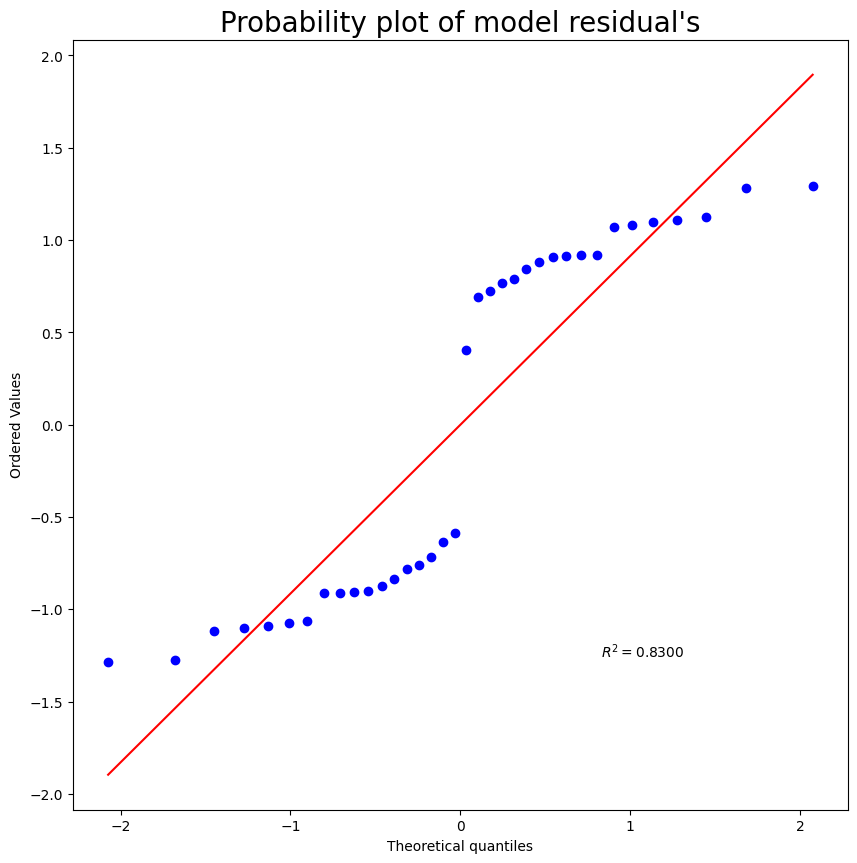

In [48]:
# Residual Analysis of the model
# normal check

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

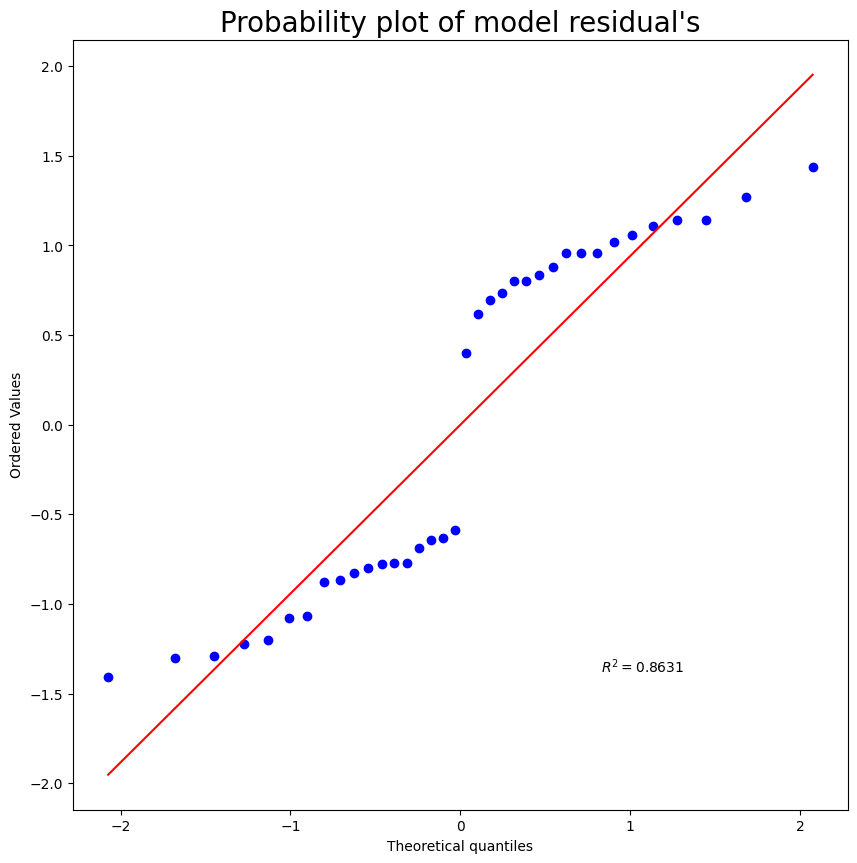

In [49]:
# Residual Analysis of the reduced model
# normal check

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [50]:
# Homogeneity of Variance check for Factor A
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['length'][df['a'] == -1],
             df['length'][df['a'] == 1])

LeveneResult(statistic=4.663302958097873, pvalue=0.03893355101989784)

In [51]:
# Homogeneity of Variance check for Factor A
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['length'][df['b'] == -1],
             df['length'][df['b'] == 1])

LeveneResult(statistic=1.5728405976484332, pvalue=0.2194793731093549)

In [52]:
# Homogeneity of Variance check for Factor C
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['length'][df['c'] == -1],
             df['length'][df['c'] == 1])


LeveneResult(statistic=0.9174820409238761, pvalue=0.34579313267859624)

In [53]:
# Homogeneity of Variance check for Factor A
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['length'][df['d'] == -1],
             df['length'][df['d'] == 1])

LeveneResult(statistic=0.006287688414385218, pvalue=0.9373246077380224)

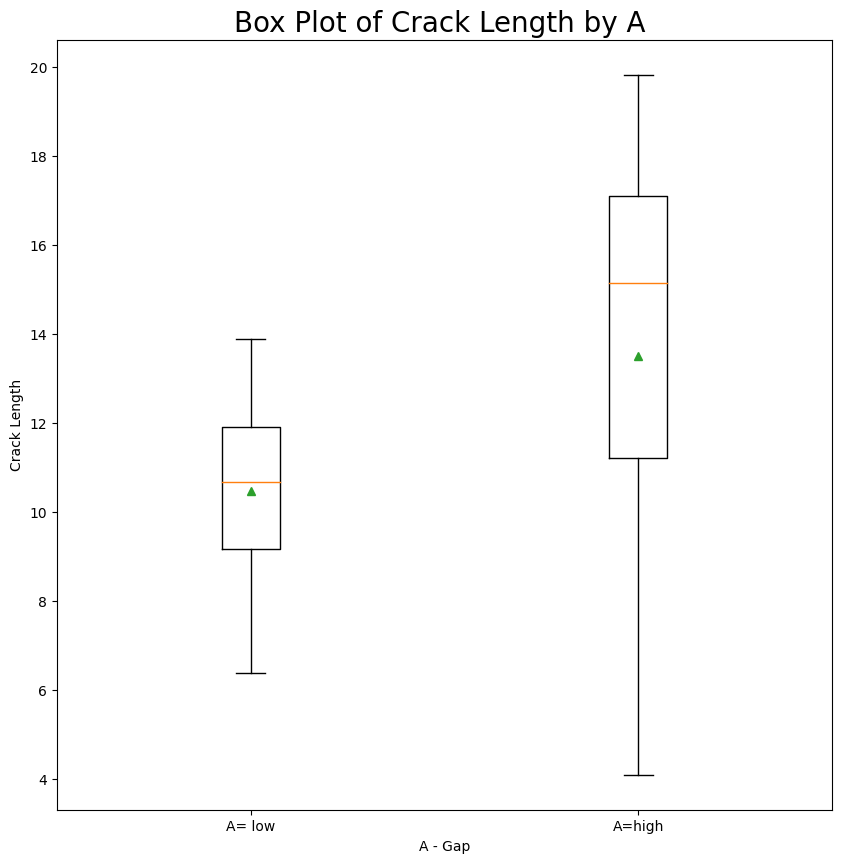

In [54]:

# Box plots by factor A'
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Crack Length by A ", fontsize= 20)
ax.set

data2 = [df['length'][df['a'] == -1],
             df['length'][df['a'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("A - Gap")
plt.ylabel("Crack Length")

plt.show()

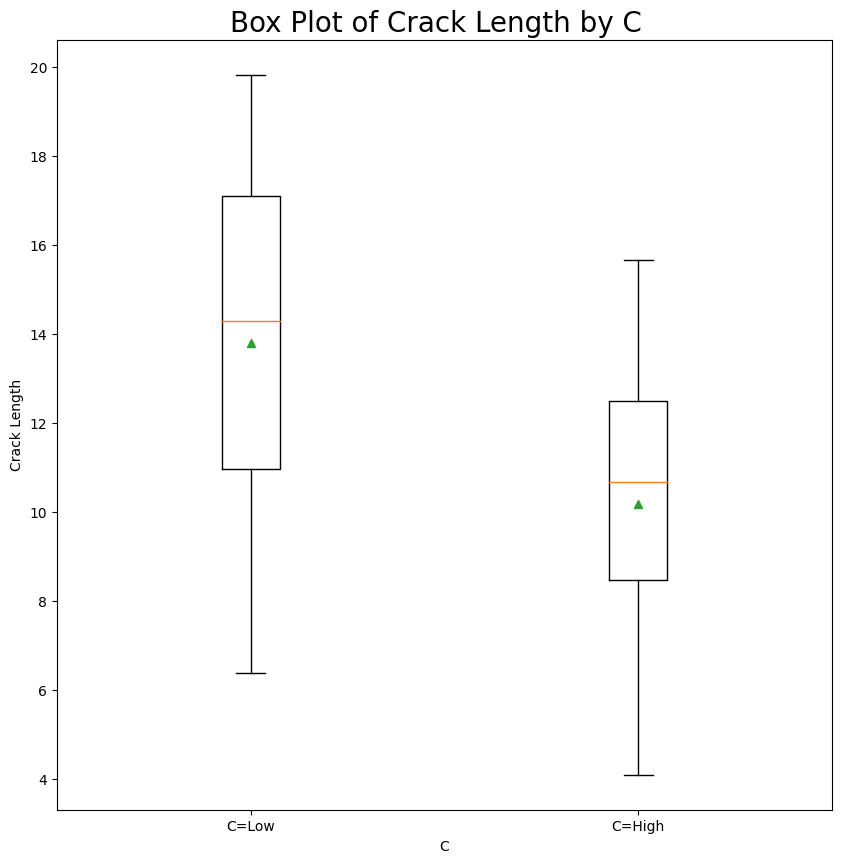

In [55]:
# Box plots by factor C
# same instruction as the previous factor

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Crack Length by C  ", fontsize= 20)
ax.set

data2 = [df['length'][df['c'] == -1],
         df['length'][df['c'] == +1]]


ax.boxplot(data2,
           labels= ['C=Low', 'C=High'],
           showmeans= True)

plt.xlabel("C")
plt.ylabel("Crack Length")

plt.show()

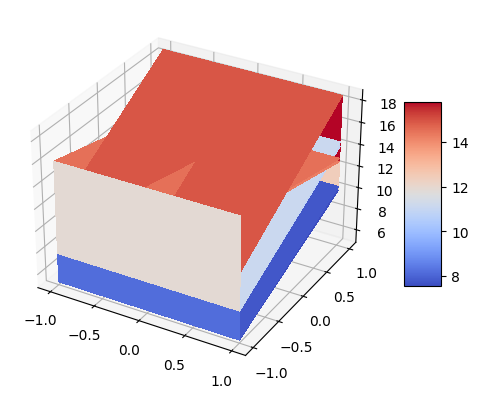

In [56]:

# 3 D plot of reduced model A, B and response SF in Z axis
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['a']
x2=df['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

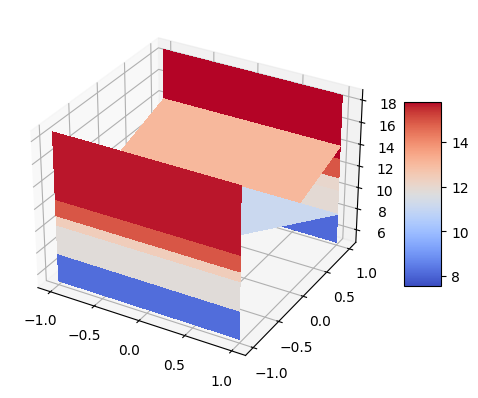

In [57]:

# 3 D plot of reduced model A, B and response SF in Z axis
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['a']
x2=df['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

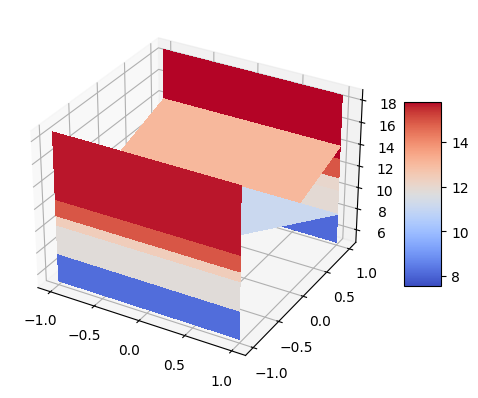

In [58]:
# 3 D plot of reduced model A, B and response SF in Z axis
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['b']
x2=df['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()